# Tasks:

- Import the pandas library as pd. Load two datasets: user_data and logs. Check the table size, variable types, presence of missing values, and descriptive statistics.
- Which client has made the most successful transactions? (success == True)
- From which platform are the most successful transactions made?
- Which platform do premium clients prefer?
- Visualize the age distribution of clients depending on the type of client (premium or not).
- Plot the distribution of the number of successful transactions.
- Visualize the number of successful transactions made on the computer platform depending on age, using sns.countplot (x – age, y – number of successful transactions). Clients of what age made the most successful actions?

1) Import the pandas library as pd. Load two datasets: user_data and logs. Check the table size, variable types, presence of missing values, and descriptive statistics.

In [12]:
import pandas as pd

user_data = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-r-borschigov/Python/Lesson_3/Miniproject/3_user_data.csv')
logs = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-r-borschigov/Python/Lesson_3/Miniproject/3_logs.csv')

In [13]:
user_data.shape

(2954, 3)

In [14]:
logs.shape

(4500, 4)

In [15]:
user_data.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [16]:
user_data

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49
...,...,...,...
2949,19411,False,29
2950,61579,False,50
2951,61221,True,64
2952,29863,False,46


In [17]:
logs.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

In [18]:
user_data.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [19]:
logs.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


In [20]:
logs.platform.nunique()

3

2) Which client has made the most successful transactions? (success == True)

In [21]:
successful_clients = logs\
.query('success == 1')\
.groupby('client', as_index = False)\
.agg({'success': 'count'})

successful_clients.query('success == 41').client

332     12179
810     28719
1020    36165
1487    52870
1758    61468
1759    61473
2231    78349
2345    82563
2626    92584
Name: client, dtype: int64

3) From which platform are the most successful transactions made?

In [22]:
logs.query('success == 1').platform.value_counts()

phone       2019
computer    1090
tablet       180
Name: platform, dtype: int64

4) Which platform do premium clients prefer?

In [23]:
df = user_data.merge(logs, on = 'client', how = 'inner')
df.query('premium == True').platform.value_counts()

phone       246
computer    150
tablet       24
Name: platform, dtype: int64

5) Visualize the age distribution of clients depending on the type of client (premium or not).

In [24]:
df

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918
...,...,...,...,...,...,...
3434,19411,False,29,True,phone,1585400902
3435,61579,False,50,True,phone,1585436158
3436,61221,True,64,True,phone,1585440218
3437,29863,False,46,True,tablet,1585443437


In [25]:
import seaborn as sns

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


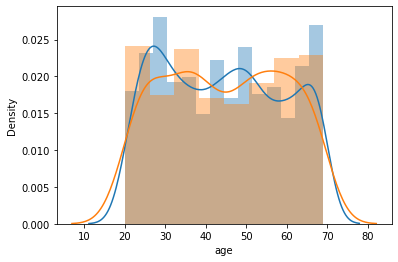

In [26]:
sns.distplot(df.query('premium == False').age)
sns.distplot(df.query('premium == True').age)

6) Plot the distribution of the number of successful transactions.

In [27]:
amount_of_successful_operations = df\
.query('success == 1')\
.groupby('client', as_index = False)\
.agg({'success': 'count'})

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


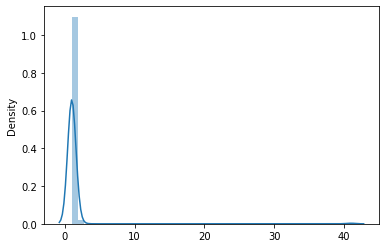

In [28]:
sns.distplot(x = amount_of_successful_operations.success)

7) Visualize the number of successful transactions made on the computer platform depending on age, using sns.countplot (x – age, y – number of successful transactions). Clients of what age made the most successful actions?

In [29]:
computer_successful_operations = df\
.query('success == 1 and platform == "computer"')\
.groupby('age', as_index = False)\
.agg({'success': 'count'})\
.sort_values('success', ascending = False)

In [30]:
computer_successful_operations

,age,success
8,28,49
29,49,33
5,25,33
12,32,27
48,68,26
4,24,26
49,69,24
45,65,23
32,52,22
34,54,22


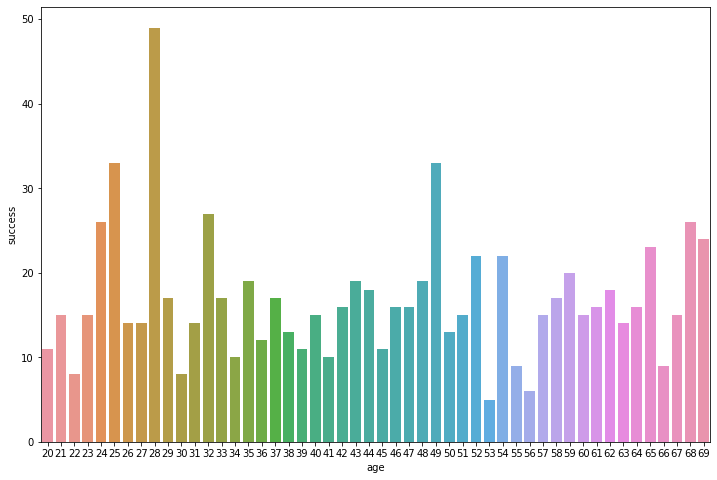

In [31]:
import matplotlib.pyplot as plt

%matplotlib inline 


plt.figure(figsize=(12, 8))
sns.barplot(data = computer_successful_operations, x = 'age', y = 'success')